# Section 1: Text processing and linguistic insights

Set up and config the environment

In [ ]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    print("This script is running on Google Colab.")
else:
    print("This script is not running on Google Colab.")

This script is running on Google Colab.


In [ ]:
if IN_COLAB:
  !pip install spacy
  !python -m spacy download en_core_web_sm
else:
  pass

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 31.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
if IN_COLAB:
  !pip install ptitprince
else:
  pass

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.1/283.1 kB 2.4 MB/s eta 0:00:00
  Created wheel for ptitprince: filename=ptitprince-0.2.7-py3-none-any.whl size=10655 sha256=b24f5d9d26da2e04e22e31e6ea74b5fb3039e978ee9798c0c87cee5be6e88b74
  Stored in directory: /root/.cache/pip/wheels/0e/43/31/e76a3bf61865543f076a9d9eb027a740caefb379424ecba4e8
Successfully built ptitprince
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


In [ ]:
import os
import json
import spacy
from spacy import displacy
import re
from collections import Counter
import matplotlib.pyplot as plt
import ptitprince as pt
import numpy as np

Load 'stories.json' file

In [ ]:
if IN_COLAB:
  from google.colab import drive
  drive.mount('/content/drive/')
  pth = '/content/drive/MyDrive/QUB MSc AI/ECS8054 - Natural Language Processing/\
Natural Language Processing - Final Assessment Project'
  print("Google Drive mounted successfully")

Mounted at /content/drive/
Google Drive mounted successfully


## 1.1 Zipf’s law

Data exploration and preparation

In [ ]:
with open(os.path.join(pth, 'stories.json'), 'r') as ifh:
    json_data = json.load(ifh)

In [ ]:
len(json_data)

700

In [ ]:
json_data[0].keys()

dict_keys(['index', 'genre', 'writer', 'quality', 'story_subject', 'action1', 'place', 'action2', 'story_object', 'ending', 'object_concept', 'story', 'question1', 'answer1', 'question2', 'answer2'])

In [ ]:
json_data[0]

{'index': 0,
 'genre': 'thriller',
 'writer': 'Samuel Beckett',
 'quality': 'depressed',
 'story_subject': 'doctor',
 'action1': 'is originally from',
 'place': 'Italy',
 'action2': 'save',
 'story_object': 'worst enemy',
 'ending': 'sad',
 'object_concept': 'trombone',
 'story': "The shadowy arms of melancholy clung persistently to him, a man whose mantle of professional duty would dress his days. Trapped within the confines of an ivory fortress, he bore the weight of split lives; where the bitter taint of a personal vendetta seeped into his terrain of medicinal providence.\\n\\nHis origin lay nestled at the foot of the Alps, where the winding cobblestone streets echoed with the romance of life's opera - an aria spilling from each open window, a vivid dance in every piazza, and a crescendo resonant in the hallowed halls of culture. This was the birthplace of his existence, although for him it was but an echo in the ether, buried under years of accumulated strife.\\n\\nHis antagonist, 

Concatenate the text contents into a single corpus

In [ ]:
story_data = []

# Iterate through each item in the JSON data
for item in json_data:
    # Extract the story content from the current item
    story_content = item.get('story', '')
    # Append the story content to the story_data list
    story_data.append(story_content)

# Concatenate all the story contents into a single corpus
story_corpus = ''.join(story_data)

Text processing

In [ ]:
# Load the English tokenizer, tagger, parser
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000

# Define function to process text
def process_text(text):
    # Remove punctuation using regular expressions
    text = re.sub(r'[^\w\s]', '', text)

    # Process text using spaCy NLP pipeline
    doc = nlp(text)

    # Extract tokens, excluding whitespace-only tokens
    tokens = [token.text for token in doc if token.text.strip()]

    return tokens

# Example text
example_text = "The striped bats are hanging, on their feet, for best sleeping."
example_tokens = process_text(example_text)

print(example_tokens)

['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best', 'sleeping']


In [ ]:
tokens = process_text(story_corpus)

Calculate token frequency

In [ ]:
token_frequency = Counter(tokens)

Token Ranking

In [ ]:
# Sort the token-frequency dictionary by frequency in descending order
sorted_tokens = sorted(token_frequency.items(), key=lambda x: x[1], reverse=True)

# Iterate through the sorted tokens and frequencies, starting from rank 1
for rank, (token, frequency) in enumerate(sorted_tokens[:20], start=1):
    # Print the rank, token, and frequency
    print(f"Rank: {rank}, Token: '{token}', Frequency: {frequency}")

Rank: 1, Token: 'the', Frequency: 19938
Rank: 2, Token: 'of', Frequency: 14883
Rank: 3, Token: 'a', Frequency: 11487
Rank: 4, Token: 'his', Frequency: 8344
Rank: 5, Token: 'and', Frequency: 6072
Rank: 6, Token: 'in', Frequency: 4889
Rank: 7, Token: 'to', Frequency: 3939
Rank: 8, Token: 'with', Frequency: 3395
Rank: 9, Token: 'was', Frequency: 3356
Rank: 10, Token: 'he', Frequency: 3029
Rank: 11, Token: 'an', Frequency: 2604
Rank: 12, Token: 'that', Frequency: 2151
Rank: 13, Token: 'as', Frequency: 1975
Rank: 14, Token: 'by', Frequency: 1775
Rank: 15, Token: 'The', Frequency: 1649
Rank: 16, Token: 'him', Frequency: 1521
Rank: 17, Token: 'had', Frequency: 1374
Rank: 18, Token: 'from', Frequency: 1263
Rank: 19, Token: 'man', Frequency: 1260
Rank: 20, Token: 'for', Frequency: 1255


In [ ]:
len(sorted_tokens)

23927

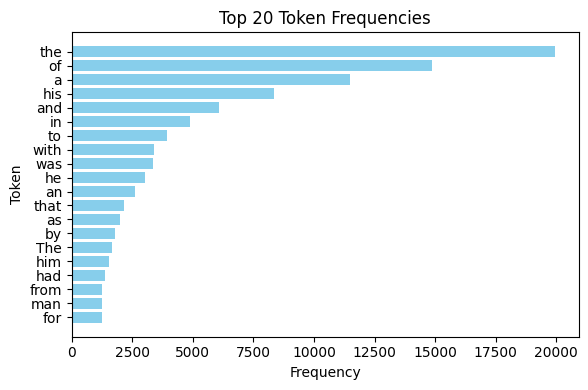

In [ ]:
top_20_tokens = sorted_tokens[:20]

tokens = [token for token, _ in top_20_tokens]
frequencies = [frequency for _, frequency in top_20_tokens]

plt.figure(figsize=(6, 4))
plt.barh(tokens, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Token')
plt.title('Top 20 Token Frequencies')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Zipf's Law

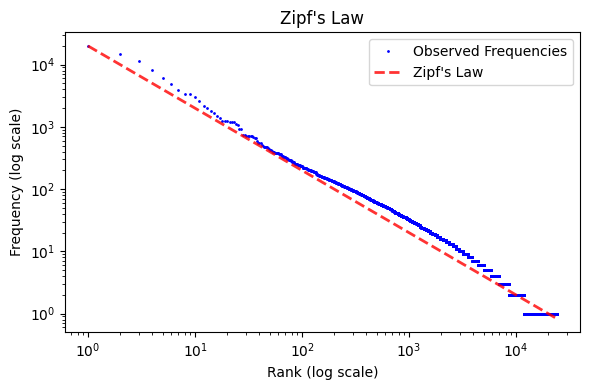

In [ ]:
# Extract frequencies from the sorted_tokens list
frequencies = [frequency for _, frequency in sorted_tokens]

# Generate ranks from 1 to the total number of frequencies
ranks = range(1, len(frequencies) + 1)

# Create a log-log plot to visualize Zipf's Law
plt.figure(figsize=(6, 4))
plt.loglog(ranks, frequencies, marker='.', linestyle='None', color='blue',
           markersize=2, label='Observed Frequencies')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title("Zipf's Law")

# Calculate the theoretical prediction of Zipf's Law
# Zipf's Law states that frequency is inversely proportional to rank
# f = C / r, where f is frequency, r is rank, and C is a constant
C = frequencies[0]  # Use the highest frequency as the constant C
zipf_line = [C / r for r in ranks]  # Generate Zipf's Law line

# Plot the theoretical Zipf's Law line
plt.loglog(ranks, zipf_line, color='red', linestyle='--', linewidth=2,
           alpha=0.8, label="Zipf's Law")
plt.legend()
plt.tight_layout()
plt.show()

## 1.2 Writing style and dependency parsing

Data exploration and preparation

In [ ]:
authors = []

# Iterate through each data item in the JSON data
for data in json_data:
    # Extract the author from the current data item
    author = data.get('writer')
    # Check if the author exists and is not already in the authors list
    if author and author not in authors:
        # Append the author to the authors list
        authors.append(author)

print(authors)

['Samuel Beckett', 'Lewis Carroll', 'Enid Blyton', 'Charles Dickens', 'Stephen King']


In [ ]:
def select_stories_by_author(json_data, target_author):
    selected_stories = []

    # Iterate through each data item in the JSON data
    for data in json_data:
        # Extract the writer's name from the current data item
        writer_name = data.get('writer')
        # Check if the writer's name matches the target author
        if writer_name == target_author:
            # Append the story written by the target author to the list
            selected_stories.append(data.get('story'))

    return selected_stories

In [ ]:
# Samuel Beckett
SB_stories = select_stories_by_author(json_data, 'Samuel Beckett')
print('count:', len(SB_stories))

# Lewis Carroll
LC_stories = select_stories_by_author(json_data, 'Lewis Carroll')
print('count:', len(LC_stories))

# Enid Blyton
EB_stories = select_stories_by_author(json_data, 'Enid Blyton')
print('count:', len(EB_stories))

# Charles Dickens
CD_stories = select_stories_by_author(json_data, 'Charles Dickens')
print('count:', len(CD_stories))

# Stephen King
SK_stories = select_stories_by_author(json_data, 'Stephen King')
print('count:', len(SK_stories))

count: 139
count: 150
count: 132
count: 142
count: 137


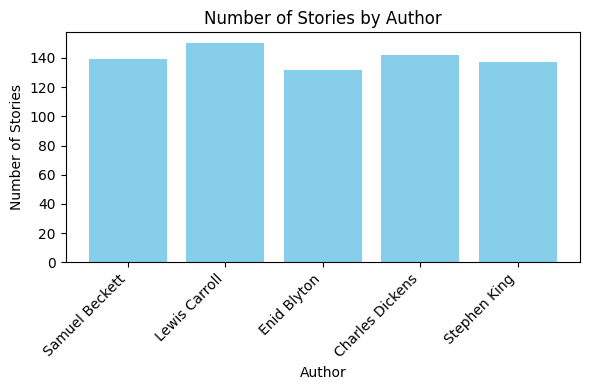

In [ ]:
story_counts = [len(SB_stories), len(LC_stories), len(EB_stories),
                len(CD_stories), len(SK_stories)]

plt.figure(figsize=(6, 4))
plt.bar(authors, story_counts, color='skyblue')
plt.xlabel('Author')
plt.ylabel('Number of Stories')
plt.title('Number of Stories by Author')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Calculate longest dependency span for each story

In [ ]:
def calculate_longest_dependency_span(stories):
    # Load the spaCy English model
    nlp = spacy.load("en_core_web_sm")
    # Initialize an empty list to store the maximum dependency span lengths
    max_deps = []
    # Iterate over each story in the input list of stories
    for story in stories:
        # Process the story using the spaCy pipeline
        doc = nlp(story)
        # Initialize the maximum span length to 0 for each story
        max_span_length = 0
        # Iterate over each token in the processed document
        for token in doc:
            # Iterate over the ancestors of each token
            for ancestor in token.ancestors:
                # Check if the ancestor is not the same token
                if ancestor is not token:
                    # Calculate the span length between the token and its ancestor
                    span_length = abs(token.i - ancestor.i)
                    # Update the maximum span length if the calculated span length is greater
                    if span_length > max_span_length:
                        max_span_length = span_length
                    else:
                        # If not greater, reset the max_span_length to 0
                        max_span_length = 0
        # Append the maximum span length of the story to the max_deps list
        max_deps.append(max_span_length)
    # Return the list of maximum dependency span lengths for each story
    return max_deps

Calculate average maximum and longest dependency

In [ ]:
def calculate_average_max_dep(max_deps):
    # Check if the max_deps list is empty
    if not max_deps:
        return 0  # Return 0 if the list is empty

    # Calculate the average maximum dependency value
    avg_max_dep = sum(max_deps) / len(max_deps)

    return avg_max_dep  # Return the average maximum dependency value

In [ ]:
# Samuel Beckett
SB_max_deps = calculate_longest_dependency_span(SB_stories)
SB_avg_max_dep = calculate_average_max_dep(SB_max_deps)
SB_longest_dep = max(SB_max_deps)
print(f"Average Maximum Dependency Span: {round(SB_avg_max_dep)}")
print(f"Longest dep span in all stories: {SB_longest_dep}")

# Lewis Carroll
LC_max_deps = calculate_longest_dependency_span(LC_stories)
LC_avg_max_dep = calculate_average_max_dep(LC_max_deps)
LC_longest_dep = max(LC_max_deps)
print(f"Average Maximum Dependency Span: {round(LC_avg_max_dep)}")
print(f"Longest dep span in all stories: {LC_longest_dep}")

# Enid Blyton
EB_max_deps = calculate_longest_dependency_span(EB_stories)
EB_avg_max_dep = calculate_average_max_dep(EB_max_deps)
EB_longest_dep = max(EB_max_deps)
print(f"Average Maximum Dependency Span: {round(EB_avg_max_dep)}")
print(f"Longest dep span in all stories: {EB_longest_dep}")

# Charles Dickens
CD_max_deps = calculate_longest_dependency_span(CD_stories)
CD_avg_max_dep = calculate_average_max_dep(CD_max_deps)
CD_longest_dep = max(CD_max_deps)
print(f"Average Maximum Dependency Span: {round(CD_avg_max_dep)}")
print(f"Longest dep span in all stories: {CD_longest_dep}")

# Stephen King
SK_max_deps = calculate_longest_dependency_span(SK_stories)
SK_avg_max_dep = calculate_average_max_dep(SK_max_deps)
SK_longest_dep = max(SK_max_deps)
print(f"Average Maximum Dependency Span: {round(SK_avg_max_dep)}")
print(f"Longest dep span in all stories: {SK_longest_dep}")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Average Maximum Dependency Span: 22
Longest dep span in all stories: 88
Average Maximum Dependency Span: 24
Longest dep span in all stories: 89
Average Maximum Dependency Span: 24
Longest dep span in all stories: 105
Average Maximum Dependency Span: 26
Longest dep span in all stories: 129
Average Maximum Dependency Span: 21
Longest dep span in all stories: 66


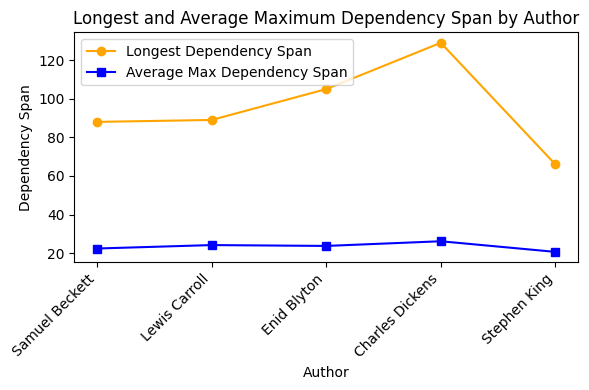

In [ ]:
longest_deps = [SB_longest_dep, LC_longest_dep, EB_longest_dep,
                CD_longest_dep, SK_longest_dep]
average_max_deps = [SB_avg_max_dep, LC_avg_max_dep, EB_avg_max_dep,
                    CD_avg_max_dep, SK_avg_max_dep]

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(authors, longest_deps, marker='o', color='orange', linestyle='-',
        label='Longest Dependency Span')
ax.plot(authors, average_max_deps, marker='s', color='blue', linestyle='-',
        label='Average Max Dependency Span')
ax.set_xlabel('Author')
ax.set_ylabel('Dependency Span')
ax.set_title('Longest and Average Maximum Dependency Span by Author')

ax.legend(loc='upper left')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


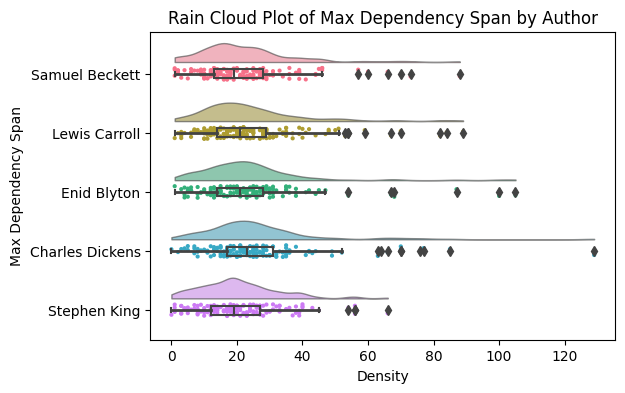

In [ ]:
all_max_deps = [SB_max_deps, LC_max_deps, EB_max_deps, CD_max_deps, SK_max_deps]

plt.figure(figsize=(6, 4))
ax = pt.RainCloud(data=all_max_deps, palette="husl", orient='h',
                  alpha=0.6, dodge=True)
plt.xlabel('Density')
plt.ylabel('Max Dependency Span')
plt.title('Rain Cloud Plot of Max Dependency Span by Author')
plt.yticks(range(len(authors)), authors)
plt.show()